In [50]:
# Import the required libraries and dependencies
import pandas as pd
import sklearn.datasets as dta
import scipy.stats as st
import matplotlib.pyplot as plt



In [51]:
# Read the data from the csv into a Pandas DataFrame with the first column as row index
music_mental_health_df = pd.read_csv("Resources/mxmh_survey_results.csv")

#Drop timestamp column
music_mental_health_df = music_mental_health_df.drop(columns=["Timestamp"])

# Review the DataFrame
music_mental_health_df.head()

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,156.0,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,119.0,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,132.0,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,84.0,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,107.0,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


In [52]:
#read data types
music_mental_health_df.dtypes

Age                             float64
Primary streaming service        object
Hours per day                   float64
While working                    object
Instrumentalist                  object
Composer                         object
Fav genre                        object
Exploratory                      object
Foreign languages                object
BPM                             float64
Frequency [Classical]            object
Frequency [Country]              object
Frequency [EDM]                  object
Frequency [Folk]                 object
Frequency [Gospel]               object
Frequency [Hip hop]              object
Frequency [Jazz]                 object
Frequency [K pop]                object
Frequency [Latin]                object
Frequency [Lofi]                 object
Frequency [Metal]                object
Frequency [Pop]                  object
Frequency [R&B]                  object
Frequency [Rap]                  object
Frequency [Rock]                 object


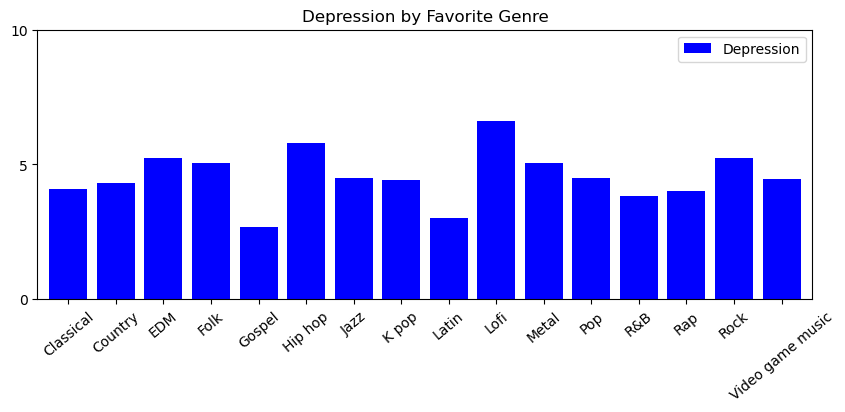

In [53]:
# Create a bar chart to chart the correlation between depression and Fav genre
genre_depression_df = music_mental_health_df[["Fav genre", "Depression"]]

fav_genre = genre_depression_df.groupby("Fav genre").mean()

fav_genre_chart = fav_genre.plot.bar(y='Depression', rot=40, width=0.8, figsize=(10,3.5), ylim=(0,10),
                                    title='Depression by Favorite Genre',
                                    yticks=[0,5,10], xlabel='', color='blue')

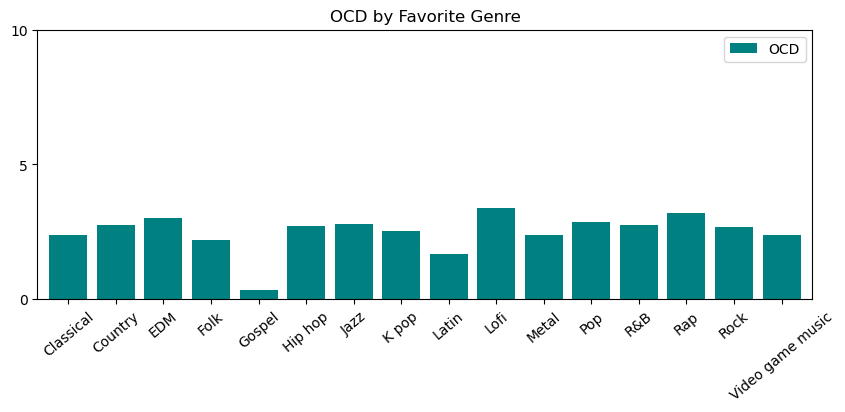

In [54]:
# Create a bar chart to chart the correlations between OCD and Fav genre
genre_ocd_df = music_mental_health_df[["Fav genre", "OCD"]]

fav_genre = genre_ocd_df.groupby("Fav genre").mean()

fav_genre_chart = fav_genre.plot.bar(y='OCD', rot=40, width=0.8, figsize=(10,3.5), ylim=(0,10),
                                    title='OCD by Favorite Genre',
                                    yticks=[0,5,10], xlabel='', color='teal')

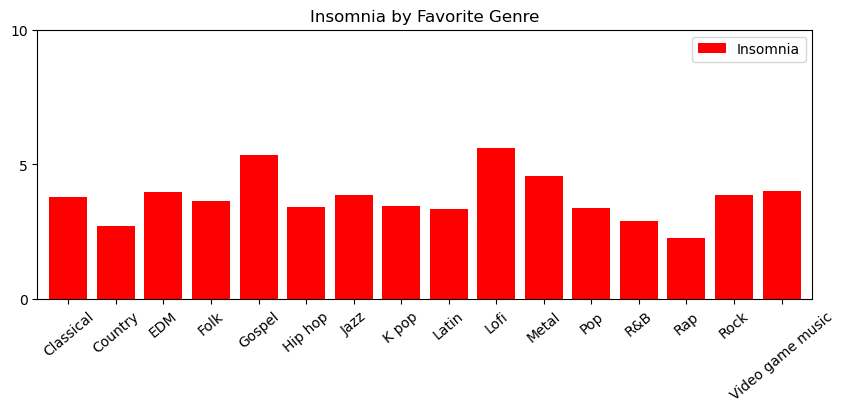

In [55]:
# Create a bar chart to chart the correlation between insomnia and Fav genre
genre_insomnia_df = music_mental_health_df[["Fav genre", "Insomnia"]]
fav_genre = genre_insomnia_df.groupby("Fav genre").mean()
fav_genre_chart = fav_genre.plot.bar(y='Insomnia', rot=40, width=0.8, figsize=(10,3.5), ylim=(0,10),
                                    title='Insomnia by Favorite Genre',
                                    yticks=[0,5,10], xlabel='', color='red')

In [56]:
df= music_mental_health_df[["Fav genre", "Depression","BPM", "OCD", "Anxiety", "Insomnia", "Age","Hours per day"]]
df_lofi = df[df["Fav genre"]=='Lofi']
df_lofi[["Depression","BPM","OCD", "Anxiety", "Insomnia", "Age", "Hours per day"]].corr()

,Depression,BPM,OCD,Anxiety,Insomnia,Age,Hours per day
Depression,1.000000,0.128445,-0.135977,0.317385,0.004526,0.605983,-0.396628
BPM,0.128445,1.000000,0.838936,0.498297,0.530213,0.111947,0.342493
OCD,-0.135977,0.838936,1.000000,0.583753,0.273805,-0.068341,0.197853
Anxiety,0.317385,0.498297,0.583753,1.000000,0.141651,0.439378,-0.132489
Insomnia,0.004526,0.530213,0.273805,0.141651,1.000000,-0.102015,0.414496
Age,0.605983,0.111947,-0.068341,0.439378,-0.102015,1.000000,-0.475404
Hours per day,-0.396628,0.342493,0.197853,-0.132489,0.414496,-0.475404,1.000000


In [57]:
# Average insomnia
average_insomnia = df_lofi['Insomnia'].mean()
print(average_insomnia)

5.6


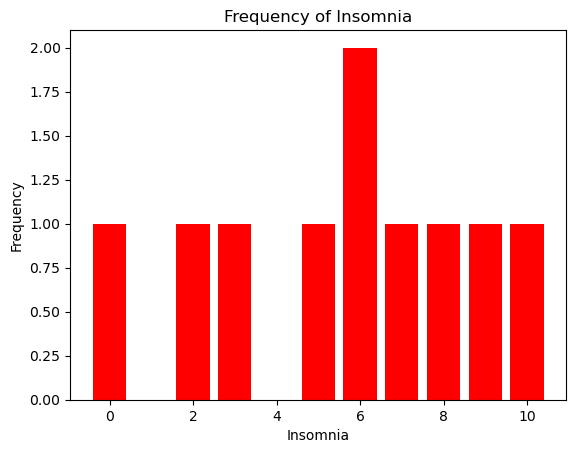

In [58]:
# View graphs on the distribution of the sample data
# Insomnia
insomnia_dist = df_lofi['Insomnia']
freq_ins_counts = insomnia_dist.value_counts()
plt.bar(freq_ins_counts.index, freq_ins_counts.values, color='red')
plt.xlabel('Insomnia')
plt.ylabel('Frequency')
plt.title('Frequency of Insomnia')
plt.show()


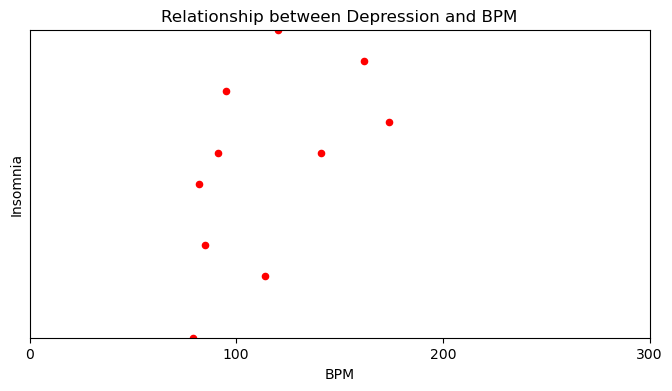

In [80]:
# Create a scatter plot to chart the correlation between insomnia and bpm
bpm_depression = df_lofi.plot.scatter(x="BPM",y="Insomnia",title="Relationship between Depression and BPM", figsize=(8,4),
                                           xlabel="BPM",ylabel="Insomnia",color="red",
                                          xlim=(0,300),ylim=(0,10),xticks=(0,100,200,300),yticks=())

In [60]:
df= music_mental_health_df[["Fav genre", "Depression","BPM", "OCD", "Anxiety", "Insomnia", "Age","Hours per day"]]
df_rock = df[df["Fav genre"]=='Rock']
df_rock[["Depression","BPM","OCD", "Anxiety", "Insomnia", "Age", "Hours per day"]].corr()

,Depression,BPM,OCD,Anxiety,Insomnia,Age,Hours per day
Depression,1.000000,0.077799,0.237873,0.553209,0.216461,-0.287373,0.049122
BPM,0.077799,1.000000,-0.066597,-0.014080,0.068845,0.076268,0.031587
OCD,0.237873,-0.066597,1.000000,0.309201,0.135856,-0.141621,0.118646
Anxiety,0.553209,-0.014080,0.309201,1.000000,0.195273,-0.338135,0.042863
Insomnia,0.216461,0.068845,0.135856,0.195273,1.000000,-0.098764,0.157769
Age,-0.287373,0.076268,-0.141621,-0.338135,-0.098764,1.000000,-0.097343
Hours per day,0.049122,0.031587,0.118646,0.042863,0.157769,-0.097343,1.000000


In [61]:
# Average insomnia
average_insomnia = df_rock['Insomnia'].mean()
print(average_insomnia)

3.88031914893617


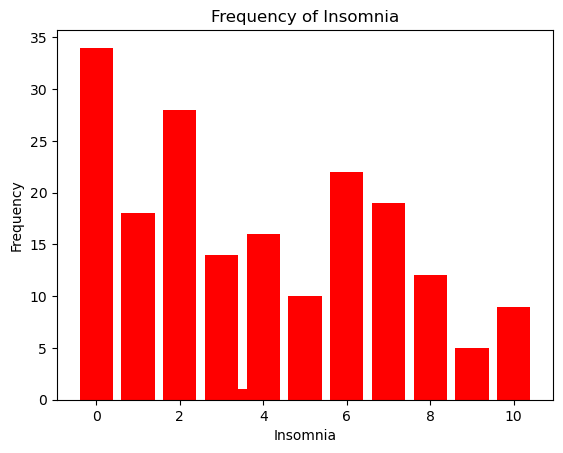

In [70]:
# View graphs on the distribution of the sample data
# Insomnia
insomnia_dist = df_rock['Insomnia']
freq_ins_counts = insomnia_dist.value_counts()
plt.bar(freq_ins_counts.index, freq_ins_counts.values, color='red')
plt.xlabel('Insomnia')
plt.ylabel('Frequency')
plt.title('Frequency of Insomnia')
plt.show()

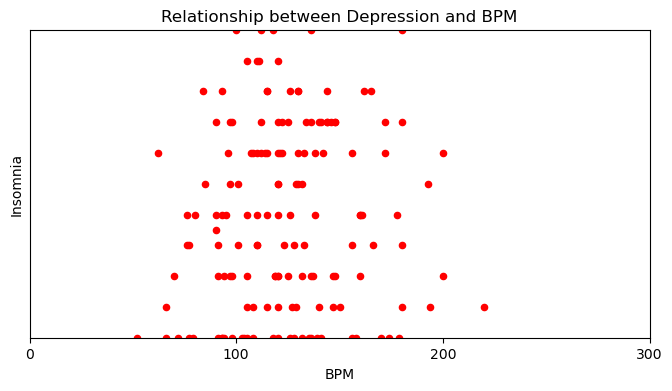

In [79]:
# Create a scatter plot to chart the correlation between insomnia and bpm
bpm_depression = df_rock.plot.scatter(x="BPM",y="Insomnia",title="Relationship between Depression and BPM", figsize=(8,4),
                                           xlabel="BPM",ylabel="Insomnia",color="red",
                                          xlim=(0,300),ylim=(0,10),xticks=(0,100,200,300),yticks=())

In [64]:
df= music_mental_health_df[["Fav genre", "Depression","BPM", "OCD", "Anxiety", "Insomnia", "Age","Hours per day"]]
df_hiphop = df[df["Fav genre"]=='Hip hop']
df_hiphop[["Depression","BPM","OCD", "Anxiety", "Insomnia", "Age", "Hours per day"]].corr()

,Depression,BPM,OCD,Anxiety,Insomnia,Age,Hours per day
Depression,1.000000,-0.213068,-0.125318,0.380359,0.297092,-0.109053,0.318382
BPM,-0.213068,1.000000,0.103311,-0.245486,0.132909,0.156195,0.171723
OCD,-0.125318,0.103311,1.000000,0.178319,-0.026981,0.042174,-0.132651
Anxiety,0.380359,-0.245486,0.178319,1.000000,-0.004427,-0.197920,-0.032285
Insomnia,0.297092,0.132909,-0.026981,-0.004427,1.000000,0.261216,0.405875
Age,-0.109053,0.156195,0.042174,-0.197920,0.261216,1.000000,-0.255038
Hours per day,0.318382,0.171723,-0.132651,-0.032285,0.405875,-0.255038,1.000000


In [65]:
# Average insomnia
average_insomnia = df_hiphop['Insomnia'].mean()
print(average_insomnia)

3.4285714285714284


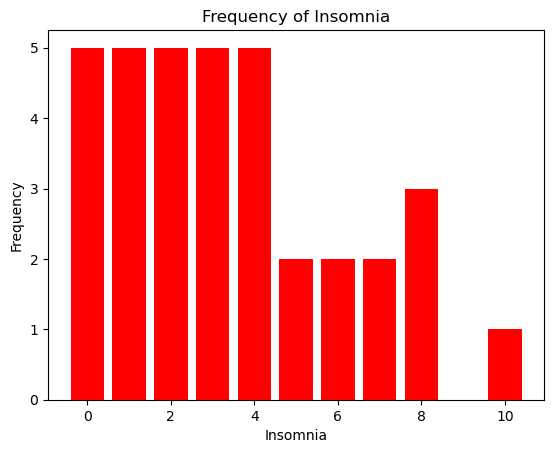

In [71]:
# View graphs on the distribution of the sample data
# Insomnia
insomnia_dist = df_hiphop['Insomnia']
freq_ins_counts = insomnia_dist.value_counts()
plt.bar(freq_ins_counts.index, freq_ins_counts.values, color='red')
plt.xlabel('Insomnia')
plt.ylabel('Frequency')
plt.title('Frequency of Insomnia')
plt.show()

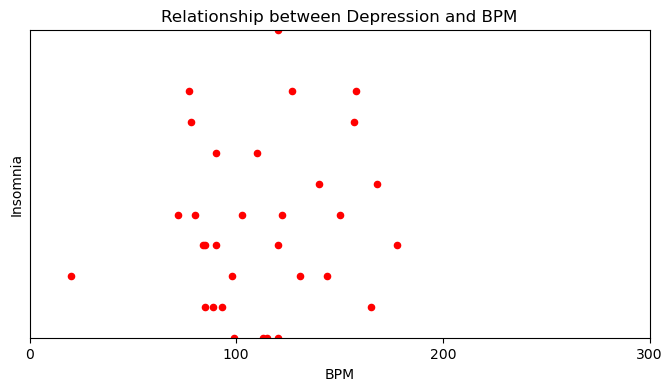

In [78]:
# Create a scatter plot to chart the correlation between insomnia and bpm
bpm_depression = df_hiphop.plot.scatter(x="BPM",y="Insomnia",title="Relationship between Depression and BPM", figsize=(8,4),
                                           xlabel="BPM",ylabel="Insomnia",color="red",
                                          xlim=(0,300),ylim=(0,10),xticks=(0,100,200,300),yticks=())